In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import shap
from google.colab import files
uploaded = files.upload()

# Cargar el dataset
df1 = pd.read_csv('data_clean_emotions_coherent.csv')

df2=pd.read_csv('data_emotions_coherent.csv')

Saving data_clean_emotions_coherent.csv to data_clean_emotions_coherent (2).csv
Saving data_emotions_coherent.csv to data_emotions_coherent.csv


In [27]:
df1  = pd.read_csv('data_clean_emotions_coherent.csv')
print(df1.head(5))

df2  = pd.read_csv('data_emotions_coherent.csv')
print(df2.head(5))

                                user_id            timestamp  \
0  ea1e733e-4885-4dcb-98b8-1ddbda9d4cc8  2024-10-14 16:17:13   
1  d9ce6989-9f1d-4021-b239-1d38dcd3e61b  2024-07-28 15:06:53   
2  5a68b4ae-b9d7-41c6-ac41-190671842b61  2024-01-21 22:25:34   
3  0f16e333-893a-4572-b3bc-9fcd79dada65  2025-10-14 17:30:46   
4  e1480809-9b62-44be-85b2-0627bc0df8f3  2024-10-17 23:49:39   

                                                text      emotion       age  \
0  I am frustrated because it is mad, stupid and ...      enojado -0.269605   
1                    This is terrible. This is awful       triste  1.474107   
2                       I am furious! So frustrated!      enojado -1.610921   
3  This is normal. Everything feels common and ty...      neutral  1.138778   
4  I am stunned because it is unbelievable, surpr...  sorprendido  1.004646   

       year     month       day  day_of_week      hour  ...  tfidf_90  \
0 -1.075333  1.000395 -0.272851    -1.428358  0.652246  ...  0.0000

In [28]:
X_text1 = df1['text']
y1 = df1['emotion']

X_text2 = df2['text']
y2 = df2['emotion']

In [29]:
# Vectorizar texto (máximo 500 palabras más frecuentes para simplicidad)
vectorizer = TfidfVectorizer(max_features=500)

X1_vect = vectorizer.fit_transform(X_text1)
X2_vect = vectorizer.fit_transform(X_text2)

In [30]:
# Dataset 1
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1_vect, y1)
accuracy1 = model1.score(X1_vect, y1)
print(f"Accuracy dataset 1: {accuracy1:.2f}")

# Dataset 2
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X2_vect, y2)
accuracy2 = model2.score(X2_vect, y2)
print(f"Accuracy dataset 2: {accuracy2:.2f}")

Accuracy dataset 1: 1.00
Accuracy dataset 2: 1.00


In [31]:
X1_dense = X1_vect.toarray()
X2_dense = X2_vect.toarray()


In [32]:
# Inicializar SHAP
explainer1 = shap.TreeExplainer(model1, X1_dense)
shap_values1 = explainer1(X1_dense)

explainer2 = shap.TreeExplainer(model2, X2_dense)
shap_values2 = explainer2(X2_dense)

 99%|===================| 4963/5000 [01:03<00:00]       

In [33]:
X1_vect = vectorizer.transform(df1['text'])  # Usar transform, NO fit_transform
X1_dense = X1_vect.toarray()
X2_vect = vectorizer.transform(df2['text'])  # Usar transform, NO fit_transform
X2_dense = X2_vect.toarray()


In [34]:
print("X1_dense.shape:", X1_dense.shape)
print("shap_values1.shape:", shap_values1.shape)
print("X2_dense.shape:", X2_dense.shape)
print("shap_values2.shape:", shap_values2.shape)


X1_dense.shape: (1000, 105)
shap_values1.shape: (1000, 105, 5)
X2_dense.shape: (1000, 105)
shap_values2.shape: (1000, 105, 5)


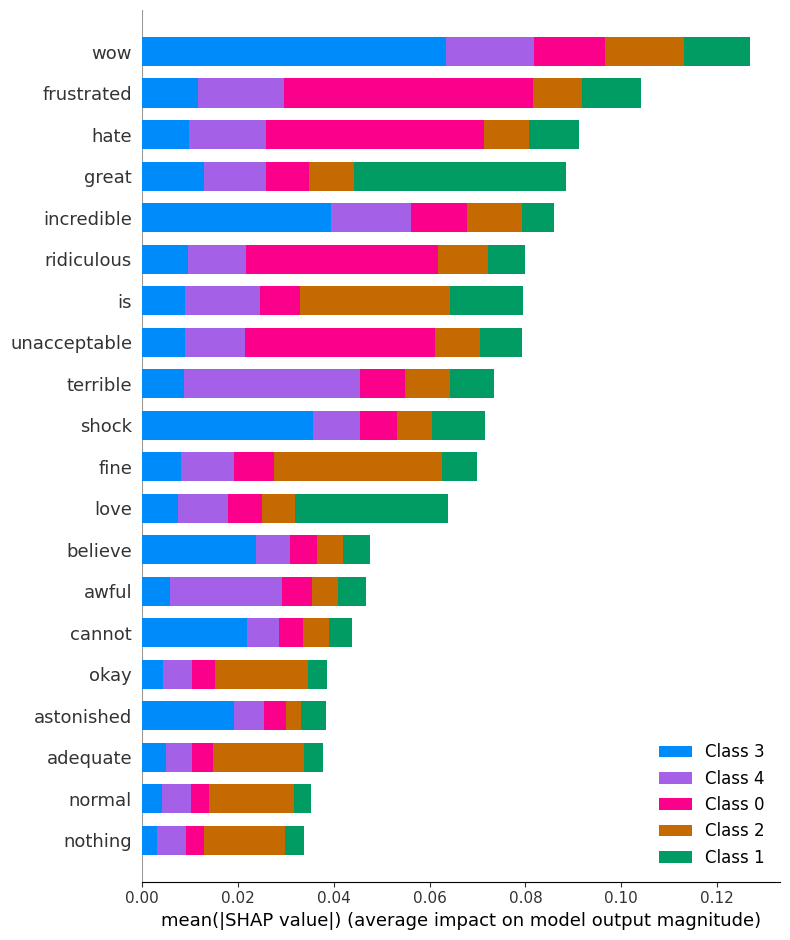

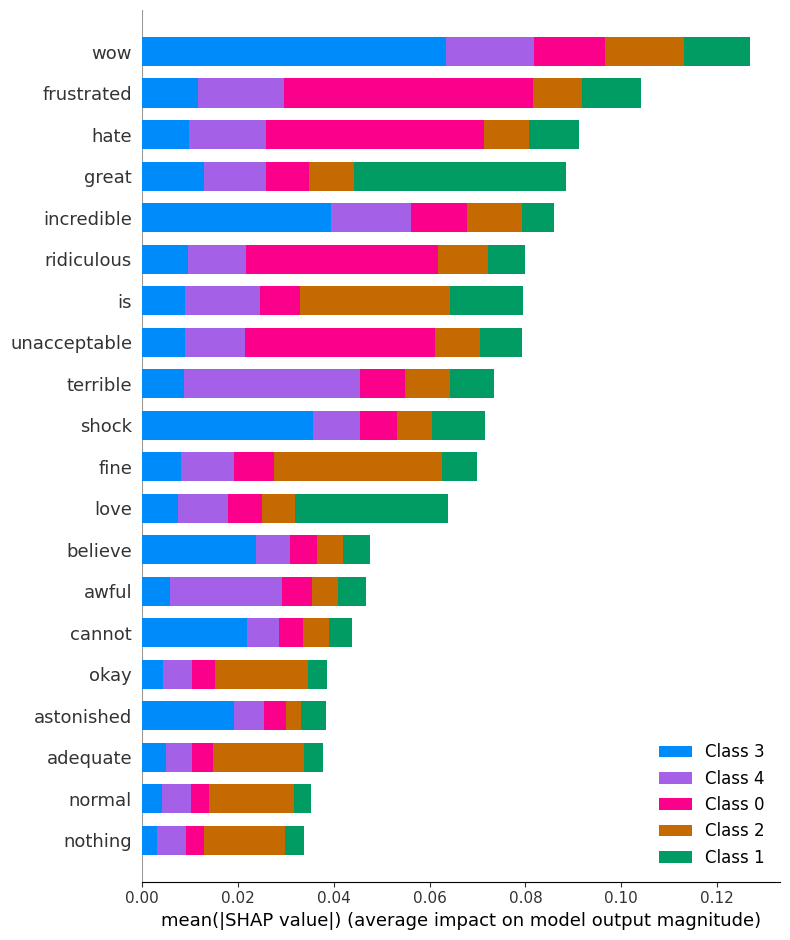

In [35]:
# Summary plot para dataset 1
shap.summary_plot(shap_values1, X1_dense, feature_names=vectorizer.get_feature_names_out())

# Summary plot para dataset 2
shap.summary_plot(shap_values2, X2_dense, feature_names=vectorizer.get_feature_names_out())


Cross_validation en el dataset clean n_splits=5

In [36]:
#Preparar el vectorizador y el modelo
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # o tu modelo

vectorizer = TfidfVectorizer(max_features=5000)  # o tu configuración
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [38]:
#Vectorizar los datos
X1_vect = vectorizer.fit_transform(df1['text'])
y1 = df1['emotion']


In [39]:
#Definir el cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X1_vect, y1, cv=kf, scoring='accuracy')
print("Accuracy por fold:", scores)
print("Accuracy media:", scores.mean())


Accuracy por fold: [0.995 1.    0.995 1.    1.   ]
Accuracy media: 0.998


In [40]:
#Entrenar un modelo final para SHAP
X1_vect_final = vectorizer.fit_transform(df1['text'])
X1_dense_final = X1_vect_final.toarray()

model.fit(X1_dense_final, y1)


RandomForestClassifier(random_state=42)

In [42]:
#Revisa las métricas por fold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X1_vect = vectorizer.fit_transform(df1['text'])
y1 = df1['emotion']

model = RandomForestClassifier(n_estimators=100, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X1_vect, y1, cv=kf, scoring='accuracy')
print("Accuracy por fold:", scores)
print("Accuracy media:", scores.mean())


Accuracy por fold: [0.995 1.    0.995 1.    1.   ]
Accuracy media: 0.998


In [49]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
# Predicciones usando cross-validation
y1_pred = cross_val_predict(model, X1_vect, y1, cv=kf)

from sklearn.metrics import classification_report

# y_pred ya viene de cross_val_predict
report = classification_report(
    y1,
    y1_pred,
    target_names=["feliz", "triste", "enojado", "sorprendido", "neutral"],
    output_dict=True   # <--- Esto lo devuelve como dict
)

# Ahora report es un diccionario
print(report)  # para ver todo

{'feliz': {'precision': 1.0, 'recall': 0.9952380952380953, 'f1-score': 0.9976133651551312, 'support': 210.0}, 'triste': {'precision': 1.0, 'recall': 0.9947089947089947, 'f1-score': 0.9973474801061007, 'support': 189.0}, 'enojado': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 198.0}, 'sorprendido': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 227.0}, 'neutral': {'precision': 0.9887640449438202, 'recall': 1.0, 'f1-score': 0.9943502824858758, 'support': 176.0}, 'accuracy': 0.998, 'macro avg': {'precision': 0.997752808988764, 'recall': 0.997989417989418, 'f1-score': 0.9978622255494216, 'support': 1000.0}, 'weighted avg': {'precision': 0.9980224719101124, 'recall': 0.998, 'f1-score': 0.9980031301401447, 'support': 1000.0}}
